[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\ravin\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ravin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
c:\Users\ravin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


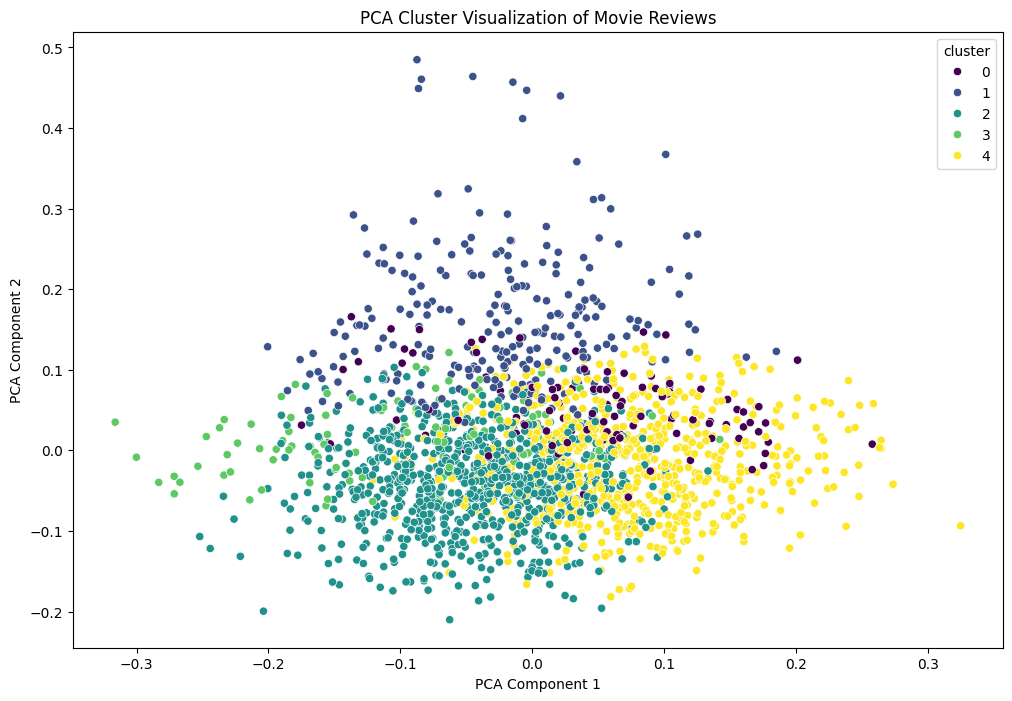

C:\Users\ravin\AppData\Local\Temp\ipykernel_6704\2054068423.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='category', data=df, palette='Set2')


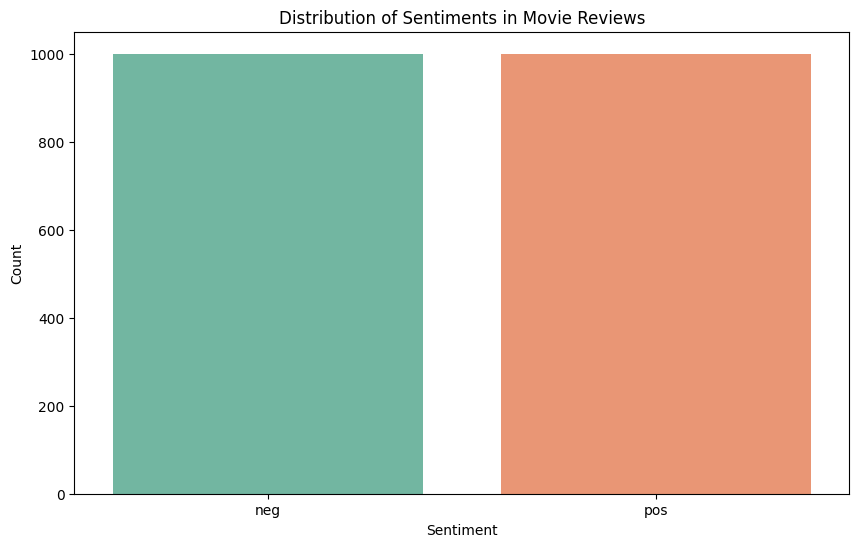

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import movie_reviews, stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Downloading NLTK data
nltk.download('movie_reviews')
nltk.download('punkt')

# Loading movie reviews dataset and preparing stopwords
stop_words = set(stopwords.words('english'))
custom_stopwords = {'film', 'movie', 'one', 'make', 'like', 'character'}  # Additional custom stopwords
stop_words.update(custom_stopwords)

# Tokenization and preprocessing function
def preprocess_text(words):
    ps = PorterStemmer()
    return [ps.stem(word.lower()) for word in words if word.isalpha() and word.lower() not in stop_words]

# Loading and preprocessing movie reviews data
documents = [(movie_reviews.raw(fileid), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]
df = pd.DataFrame(documents, columns=['text', 'category'])

# Tokenize and preprocess text
df['tokens'] = df['text'].apply(word_tokenize)
df['processed_words'] = df['tokens'].apply(preprocess_text)
df['processed_text'] = df['processed_words'].apply(lambda x: ' '.join(x))

# Vectorizing text data
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df['processed_text'])

# Dimensionality reduction with PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X.toarray())

# Clustering with KMeans
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(X.toarray())

# Visualizing clusters using PCA components
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['cluster'], palette='viridis', legend='full')
plt.title('PCA Cluster Visualization of Movie Reviews')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# Visualizing sentiment distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='category', data=df, palette='Set2')
plt.title('Distribution of Sentiments in Movie Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()
